In [2]:
import pandas as pd
import itertools as it
import collections
%matplotlib inline
data = pd.read_csv('movie_bd_v5.csv')

In [3]:
def separation(data):
    if '|' in data:
        data = data.split('|')
    return data

In [3]:
type(data['genres'][0])

str

In [4]:
'displaying the entire dataset for easier navigation'

data

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
0,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,6.5,2015
1,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,7.1,2015
2,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,6.3,2015
3,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,7.5,2015
4,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,tt0120903,75000000,157299717,X-Men,Patrick Stewart|Hugh Jackman|Ian McKellen|Hall...,Bryan Singer,Evolution Begins,"Two mutants, Rogue and Wolverine, come to a pr...",104,Adventure|Action|Science Fiction,Twentieth Century Fox Film Corporation|Donners...,7/13/2000,6.6,2000
1885,tt0192255,22000000,13555988,The Little Vampire,Richard E. Grant|Jonathan Lipnicki|Jim Carter|...,Uli Edel,"They're not just best friends, they're blood b...","Based on the popular books, the story tells of...",95,Horror|Family|Foreign,New Line Cinema,10/27/2000,6.4,2000
1886,tt0131704,76000000,35134820,The Adventures of Rocky & Bullwinkle,Rene Russo|Jason Alexander|Piper Perabo|Randy ...,Des McAnuff,This summer it's not the same old bull.,Rocky and Bullwinkle have been living off the ...,88,Adventure|Animation|Action|Comedy|Family,Universal Pictures|Capella International|KC Me...,6/30/2000,4.0,2000
1887,tt0162983,40000000,36037909,Hanging Up,Meg Ryan|Diane Keaton|Lisa Kudrow|Walter Matth...,Diane Keaton,Every family has a few hang-ups.,A trio of sisters bond over their ambivalence ...,94,Comedy|Drama,Laurence Mark Productions|Columbia Pictures Co...,2/16/2000,5.2,2000


In [6]:
'question_1 = data.loc[data['original_title'].isin 
                       (['The Dark Knight Rises',
                        'Spider-Man 3',
                        'Avengers: Age of Ultron',
                       "The Warrior's Way",
                       'Pirates of the Caribbean: On Stranger Tides'])]'
question_1 = data.loc[data['budget'] == data['budget'].max()]
question_1

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
723,tt1298650,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/2011,6.3,2011


In [ ]:
question_2 = data[data['runtime'] == data['runtime'].max()]
question_2

In [ ]:
question_3 = data[data['runtime'] == data['runtime'].min()]
question_3

In [ ]:
question_4 = data.runtime.mean()
question_5 = data.runtime.median()
print(question_4, question_5)

In [ ]:
data['profit'] = data['revenue'] - data['budget']

In [ ]:
question_6 = data[data['profit'] == data['profit'].max()]
question_6

In [ ]:
question_7 = data[data['profit'] == data['profit'].min()]
question_7

In [ ]:
question_8 = data.query('profit>0').count()
question_8

In [ ]:
question_9 = data.loc[data['release_year'] == 2008]

question_9.loc[question_9['profit'] == question_9['profit'].max()]

In [ ]:
question_10 = data.loc[data['release_year'].isin(['2012','2013','2014'])]

question_10.loc[question_10['profit'] == question_10['profit'].min()]

In [ ]:
data['genres'] = data['genres'].apply(separation)
question_11 = data.explode('genres')
question_11.genres.value_counts()

In [ ]:
question_12 = data.query('profit>0').explode('genres')
question_12.genres.value_counts()

In [ ]:
data['director'] = data['director'].apply(separation)
question_13 = data.explode('director')
question_13.groupby(['director'])['revenue'].sum().sort_values(ascending = False)

In [ ]:
question_14 = question_13.explode('genres')
question_14 = question_14[question_14['genres'] == 'Action']
question_14.director.value_counts()

In [ ]:
data['cast'] = data['cast'].apply(separation)
question_15 = data[data['release_year'] == 2012].explode('cast').groupby(['cast'])['profit'].sum()
question_15.loc[question_15 == question_15.max()]

In [ ]:
question_16 = data[data['budget'] > data['budget'].mean()].explode('cast').cast.value_counts()
question_16

In [ ]:
question_17 = data.explode('cast')
question_17 = question_17[question_17['cast'] == 'Nicolas Cage'].explode('genres').genres.value_counts()
question_17

In [ ]:
#data['production_companies'] = data['production_companies'].apply(separation)
#question_18 = data.explode('production_companies')
#question_18 = question_18[question_18['production_companies'] == 'Paramount Pictures']
question_18 = data[data.production_companies.str.contains('Paramount Pictures')]
question_18.loc[question_18['profit'] == question_18['profit'].min()]

In [ ]:
question_19 = data.groupby(['release_year'])['profit'].sum()
question_19.loc[question_19 == question_19.max()]

In [ ]:
question_20 = data[data.production_companies.str.contains('Warner Bros')].groupby(['release_year'])['profit'].sum()
question_20.loc[question_20 == question_20.max()]

In [ ]:
release_date = data['release_date'].apply(lambda x:x.split('/'))
data['release_month'] = release_date.apply(lambda x:x[0])
question_21 = data['release_month'].value_counts()
question_21

In [ ]:
question_22 = len(data.loc[data['release_month'].isin(['6','7','8'])])
question_22

In [ ]:
question_23 = data.loc[data['release_month'].isin(['1','2','12'])].explode('director')
question_23.director.value_counts()

In [ ]:
data['production_companies'] = data['production_companies'].apply(separation)
question_24 = data.explode('production_companies')
question_24['title_length'] = question_24['original_title'].apply(lambda x:len(x))
question_24 = question_24.groupby(['production_companies'])['title_length'].mean()
question_24.loc[question_24 == question_24.max()]

In [ ]:
word_count = data.overview.str.replace(', ',' ')
word_count = word_count.str.replace('.',' ')
word_count = word_count.str.replace(':',' ')
word_count = word_count.str.replace('-',' ')
word_count = word_count.str.replace(';',' ')
word_count = word_count.apply(lambda x:x.split(' '))
data['word_count'] = word_count.apply(lambda x: len(x))
question_25 = data.explode('production_companies').groupby(['production_companies'])['word_count'].mean()
question_25.loc[question_25 == question_25.max()]

In [9]:
boundary = data['vote_average'].quantile(0.99)
question_26 = data.loc[data['vote_average'] > boundary]
question_26

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
9,tt2096673,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/2015,8.0,2015
34,tt3170832,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,Love knows no boundaries,Jack is a young boy of 5 years old who has liv...,117,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,10/16/2015,8.0,2015
118,tt0816692,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/2014,8.0,2014
119,tt2015381,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,All heroes start somewhere.,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/2014,7.9,2014
125,tt2084970,14000000,233555708,The Imitation Game,Benedict Cumberbatch|Keira Knightley|Matthew G...,Morten Tyldum,The true enigma was the man who cracked the code.,Based on the real life story of legendary cryp...,113,History|Drama|Thriller|War,Black Bear Pictures|Bristol Automotive,11/14/2014,8.0,2014
128,tt2267998,61000000,369330363,Gone Girl,Ben Affleck|Rosamund Pike|Carrie Coon|Neil Pat...,David Fincher,You don't know what you've got 'til it's...,With his wife's disappearance having become th...,145,Mystery|Thriller|Drama,Twentieth Century Fox Film Corporation|Regency...,10/1/2014,7.9,2014
138,tt2278388,30000000,174600318,The Grand Budapest Hotel,Ralph Fiennes|Tony Revolori|F. Murray Abraham|...,Wes Anderson,A perfect holiday without leaving home.,The Grand Budapest Hotel tells of a legendary ...,99,Comedy|Drama,Fox Searchlight Pictures|Scott Rudin Productio...,2/26/2014,7.9,2014
370,tt1375666,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,Your mind is the scene of the crime.,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,7.9,2010
599,tt0468569,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/2008,8.1,2008
872,tt0253474,35000000,120072577,The Pianist,Adrien Brody|Thomas Kretschmann|Frank Finlay|M...,Roman Polanski,Music was his passion. Survival was his master...,The Pianist is a film adapted from the biograp...,150,Drama|War,Bac Films|Canal+Polska|Heritage Films|Studio B...,9/24/2002,7.9,2002


In [ ]:
data27 = pd.read_csv('movie_bd_v5.csv')
data27['cast'] = data27['cast'].str.split('|')
data_p = data27['cast'].reset_index()
data_p['pairs'] = data_p['cast'].apply(lambda s: list(it.combinations(s, 2)))
data_p = data_p.explode('pairs').reset_index()
collections.Counter(data_p['pairs']).most_common(1)

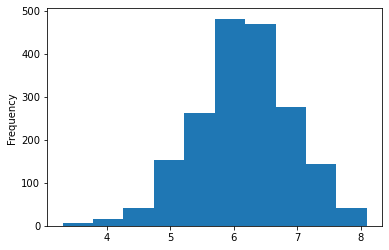

In [4]:
data['vote_average'].plot(kind = 'hist')